# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url + "&appid=" + weather_api_key + "&q=London"
query_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ce568f48454f6b544e5f349933a175e8&q=London'

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# city_data = []
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1

for city in cities:
    query_url = url + "&appid=" + weather_api_key + "&q=" + city
    print(f"Processing Record {record_count} | {city}")
    record_count += 1
    
    try:
        weather = requests.get(query_url).json()
        
        lat.append(weather['coord']['lat'])
        lng.append(weather['coord']['lon'])
        max_temp.append(weather['main']['temp_max'])
        humidity.append(weather['main']['humidity'])
        clouds.append(weather['clouds']['all'])
        wind.append(weather['wind']['speed'])
        country.append(weather['sys']['country'])
        date.append(weather['dt'])
        city_list.append(city)
        
    except: 
        print("City not found. Skipping...")
    pass

# # Build query URL


Beginning Data Retrieval
-----------------------------
Processing Record 1 | ribeira grande
Processing Record 2 | atuntaqui
Processing Record 3 | rikitea
Processing Record 4 | atar
Processing Record 5 | atuona
Processing Record 6 | qaanaaq
Processing Record 7 | rosita
Processing Record 8 | mahebourg
Processing Record 9 | victor harbor
Processing Record 10 | galeana
Processing Record 11 | aykhal
Processing Record 12 | ushuaia
Processing Record 13 | nikolskoye
Processing Record 14 | waipawa
Processing Record 15 | caarapo
Processing Record 16 | hohhot
Processing Record 17 | yulara
Processing Record 18 | bure
Processing Record 19 | castro
Processing Record 20 | suba
Processing Record 21 | vaini
Processing Record 22 | bluff
Processing Record 23 | akyab
Processing Record 24 | umm jarr
City not found. Skipping...
Processing Record 25 | college
Processing Record 26 | syumsi
Processing Record 27 | cap malheureux
Processing Record 28 | kingman
Processing Record 29 | tasiilaq
Processing Record 30

Processing Record 232 | carnarvon
Processing Record 233 | mangai
Processing Record 234 | iqaluit
Processing Record 235 | campbell river
Processing Record 236 | ayios matthaios
City not found. Skipping...
Processing Record 237 | amahai
Processing Record 238 | awbari
Processing Record 239 | flinders
Processing Record 240 | laguna
Processing Record 241 | venice
Processing Record 242 | berlevag
Processing Record 243 | tommot
Processing Record 244 | port elizabeth
Processing Record 245 | baglung
Processing Record 246 | victoria
Processing Record 247 | hasaki
Processing Record 248 | bushehr
Processing Record 249 | carauari
Processing Record 250 | umm lajj
Processing Record 251 | bac lieu
Processing Record 252 | kruisfontein
Processing Record 253 | cape town
Processing Record 254 | nizhnyaya pavlovka
City not found. Skipping...
Processing Record 255 | boden
Processing Record 256 | giaveno
Processing Record 257 | newport
Processing Record 258 | tena
Processing Record 259 | mount isa
Processing

Processing Record 456 | eyl
Processing Record 457 | diffa
Processing Record 458 | jizan
Processing Record 459 | van buren
Processing Record 460 | jega
Processing Record 461 | punta alta
Processing Record 462 | sisimiut
Processing Record 463 | constitucion
Processing Record 464 | ambulu
Processing Record 465 | jibuti
Processing Record 466 | chumikan
Processing Record 467 | ruian
City not found. Skipping...
Processing Record 468 | kachikau
City not found. Skipping...
Processing Record 469 | minsk
Processing Record 470 | walvis bay
Processing Record 471 | agva
City not found. Skipping...
Processing Record 472 | eyrarbakki
Processing Record 473 | poum
Processing Record 474 | ponferrada
Processing Record 475 | riyadh
Processing Record 476 | touros
Processing Record 477 | dhidhdhoo
Processing Record 478 | mahibadhoo
Processing Record 479 | alpena
Processing Record 480 | tateyama
Processing Record 481 | jiblah
Processing Record 482 | kismayo
Processing Record 483 | smithers
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Converting array of JSONs to a Pandas DataFrame
weather_dict = {
        "City": city_list,
        "Lat": lat,
        "Lng": lng,
        "Max Temp": max_temp,
        "Humidity": humidity,
        "Cloudiness": clouds,
        "Wind Speed": wind,
        "Country": country,
        "Date": date
    }

city_data = pd.DataFrame(weather_dict)
city_data.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [16]:
# Exporting DataFrame to .cvs
city_data.to_csv('output_data\city_data.csv', index=False)

In [17]:
# Display the DataFrame
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,56,20,13.87,PT,1601396713
1,atuntaqui,0.33,-78.22,73.40,33,20,8.05,EC,1601396714
2,rikitea,-23.12,-134.97,70.25,80,100,20.54,PF,1601396714
3,atar,20.52,-13.05,101.71,14,0,8.23,MR,1601396714
4,atuona,-9.80,-139.03,77.04,74,0,19.42,PF,1601396715


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.252930,18.172344,66.393626,69.836996,50.930403,8.240696,1.601397e+09
std,33.458097,90.118935,18.095554,21.484472,37.327004,5.479584,8.853182e+01
min,-54.800000,-175.200000,16.320000,6.000000,0.000000,0.400000,1.601396e+09
25%,-8.035000,-59.715000,53.600000,59.000000,16.250000,4.007500,1.601397e+09
50%,20.610000,22.240000,69.800000,76.000000,51.500000,6.930000,1.601397e+09
75%,48.605000,102.267500,79.605000,85.000000,90.000000,11.410000,1.601397e+09
max,78.220000,179.320000,110.790000,100.000000,100.000000,33.330000,1.601397e+09


In [23]:
#  Get the indices of cities that have humidity over 100%.

city_data.loc[city_data["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_data = clean_data.drop(index =64)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

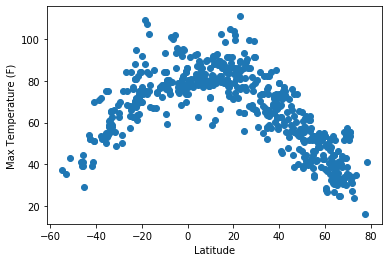

In [24]:
x_values = city_data['Lat']
y_values = city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

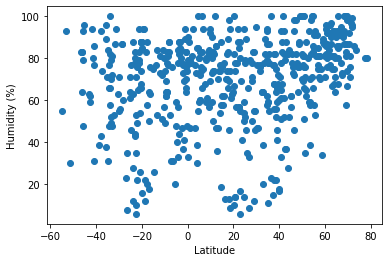

In [25]:
x_values = city_data['Lat']
y_values = city_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("output_data/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

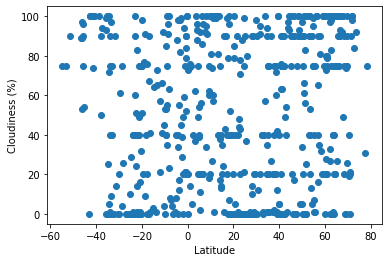

In [26]:
x_values = city_data['Lat']
y_values = city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("output_data/lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

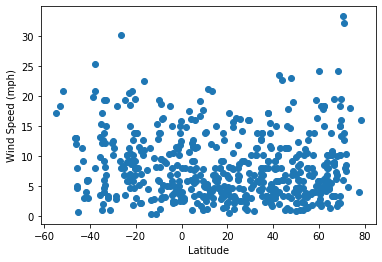

In [27]:
x_values = city_data['Lat']
y_values = city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("output_data/lat_wind.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = city_data.loc[city_data["Lat"]>=0]
northern_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.52,-28.70,73.40,56,20,13.87,PT,1601396713
1,atuntaqui,0.33,-78.22,73.40,33,20,8.05,EC,1601396714
3,atar,20.52,-13.05,101.71,14,0,8.23,MR,1601396714
5,qaanaaq,77.48,-69.36,16.32,80,31,4.03,GL,1601396715
6,rosita,13.93,-84.40,89.58,54,38,2.98,NI,1601396716


In [31]:
southern_data = city_data.loc[city_data["Lat"]< 0]
southern_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,rikitea,-23.12,-134.97,70.25,80,100,20.54,PF,1601396714
4,atuona,-9.80,-139.03,77.04,74,0,19.42,PF,1601396715
7,mahebourg,-20.41,57.70,73.40,88,75,8.05,MU,1601396716
8,victor harbor,-35.57,138.62,55.00,89,93,9.93,AU,1601396716
11,ushuaia,-54.80,-68.30,37.40,55,75,17.22,AR,1601396718


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.77x +93.73
The r-squared is: 0.7240540541947726


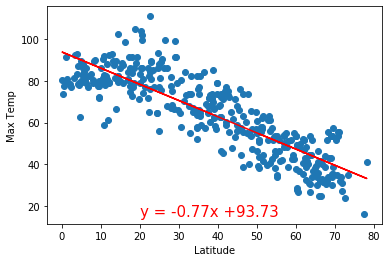

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

x_values = northern_data['Lat']
y_values = northern_data['Max Temp']

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/north_temp_linear.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.81x +87.89
The r-squared is: 0.5785989370967765


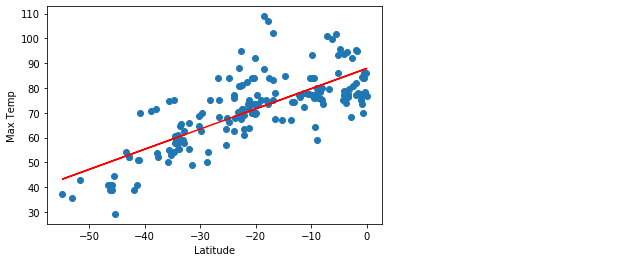

In [36]:
x_values = southern_data['Lat']
y_values = southern_data['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/south_temp_linear.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.29x +60.68
The r-squared is: 0.08719677658118183


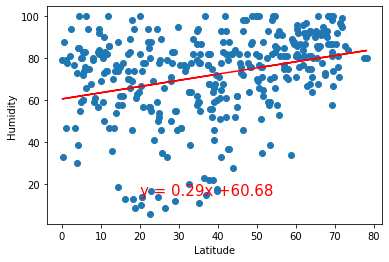

In [37]:
x_values = northern_data['Lat']
y_values = northern_data['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/north_humidity_linear.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.01x +65.6
The r-squared is: 4.560806350118893e-05


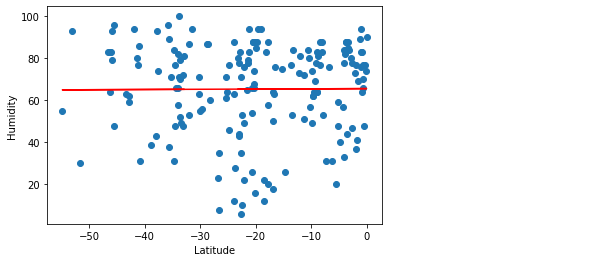

In [38]:
x_values = southern_data['Lat']
y_values = southern_data['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/south_humidity_linear.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.21x +44.45
The r-squared is: 0.014324737321906011


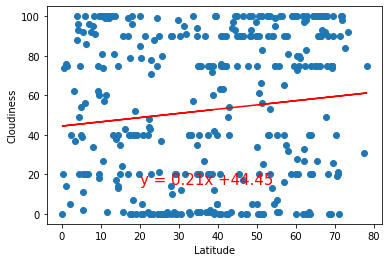

In [39]:
x_values = northern_data['Lat']
y_values = northern_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/north_cloud_linear.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.27x +41.73
The r-squared is: 0.010672825561064341


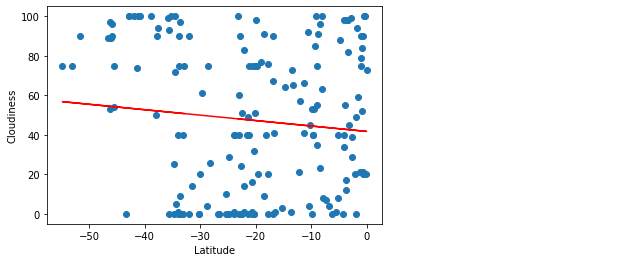

In [40]:
x_values = southern_data['Lat']
y_values = southern_data['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/south_cloud_linear.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x +6.71
The r-squared is: 0.011884541855017604


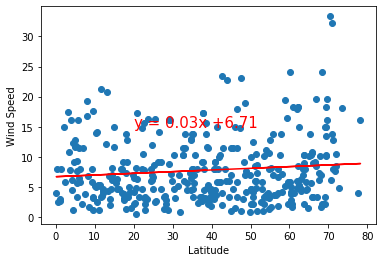

In [41]:
x_values = northern_data['Lat']
y_values = northern_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/north_wind_linear.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x +7.71
The r-squared is: 0.03288674871743582


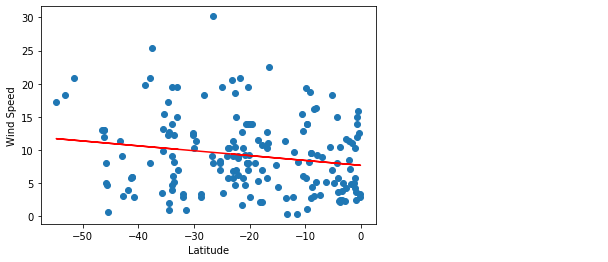

In [42]:
x_values = southern_data['Lat']
y_values = southern_data['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.savefig("output_data/south_wind_linear.png")
plt.show()